In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import itertools
import pandas as pd
import pickle
import bikes
import mse
import prediction_plots as pplot
import warnings
from pmdarima import auto_arima
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

In [2]:
master = pd.read_csv('master.csv')

In [3]:
master.set_index('date_of_trip', inplace = True)

In [4]:
master.index = pd.to_datetime(master.index)

In [5]:
master_w = master.resample('w').sum()

In [6]:
master_w.drop(index = pd.to_datetime('2019-08-04'), inplace = True)

In [7]:
master_m = master.resample('m').sum()

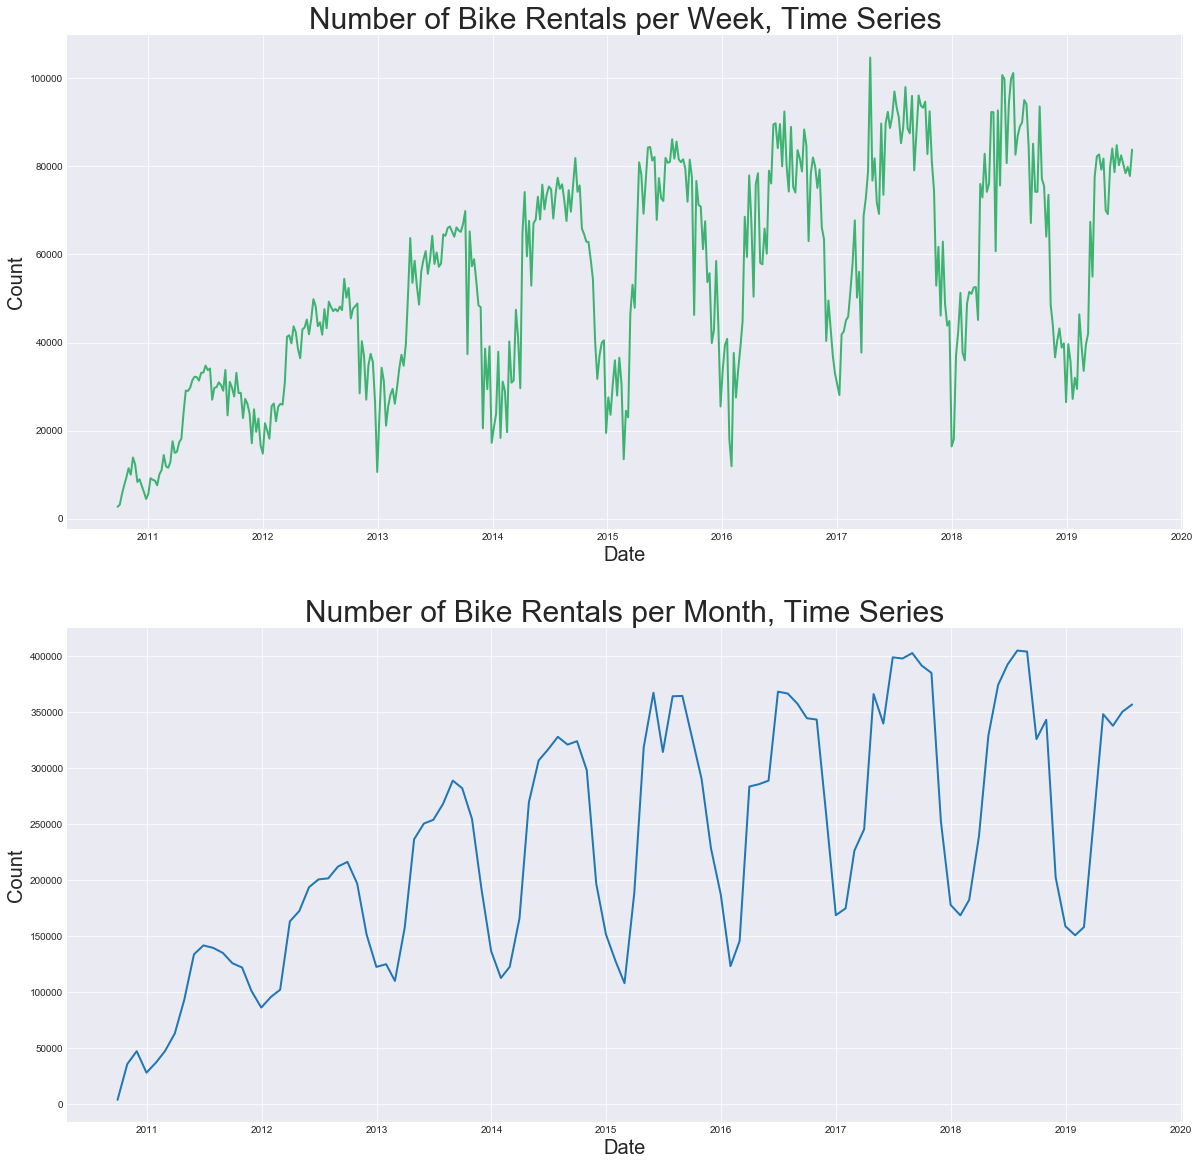

In [8]:
fig = plt.figure(figsize = (20,20))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

ax1.plot(master_w, lw = 2, color = 'mediumseagreen')
ax2.plot(master_m, lw = 2)

ax1.set_xlabel('Date', fontsize = 20);
ax1.set_ylabel('Count', fontsize = 20);

ax2.set_xlabel('Date', fontsize = 20);
ax2.set_ylabel('Count', fontsize = 20);

ax1.set_title('Number of Bike Rentals per Week, Time Series', fontsize = 30);
ax2.set_title('Number of Bike Rentals per Month, Time Series', fontsize = 30);

In [9]:
TRAIN = .7
train_index_w = int(len(master_w)*TRAIN) + 1
train_w = master_w.iloc[:train_index_w]
test_w = master_w.iloc[train_index_w:]
train_index_m = int(len(master_m)*TRAIN) + 1
train_m = master_m.iloc[:train_index_m]
test_m = master_m.iloc[train_index_m:]

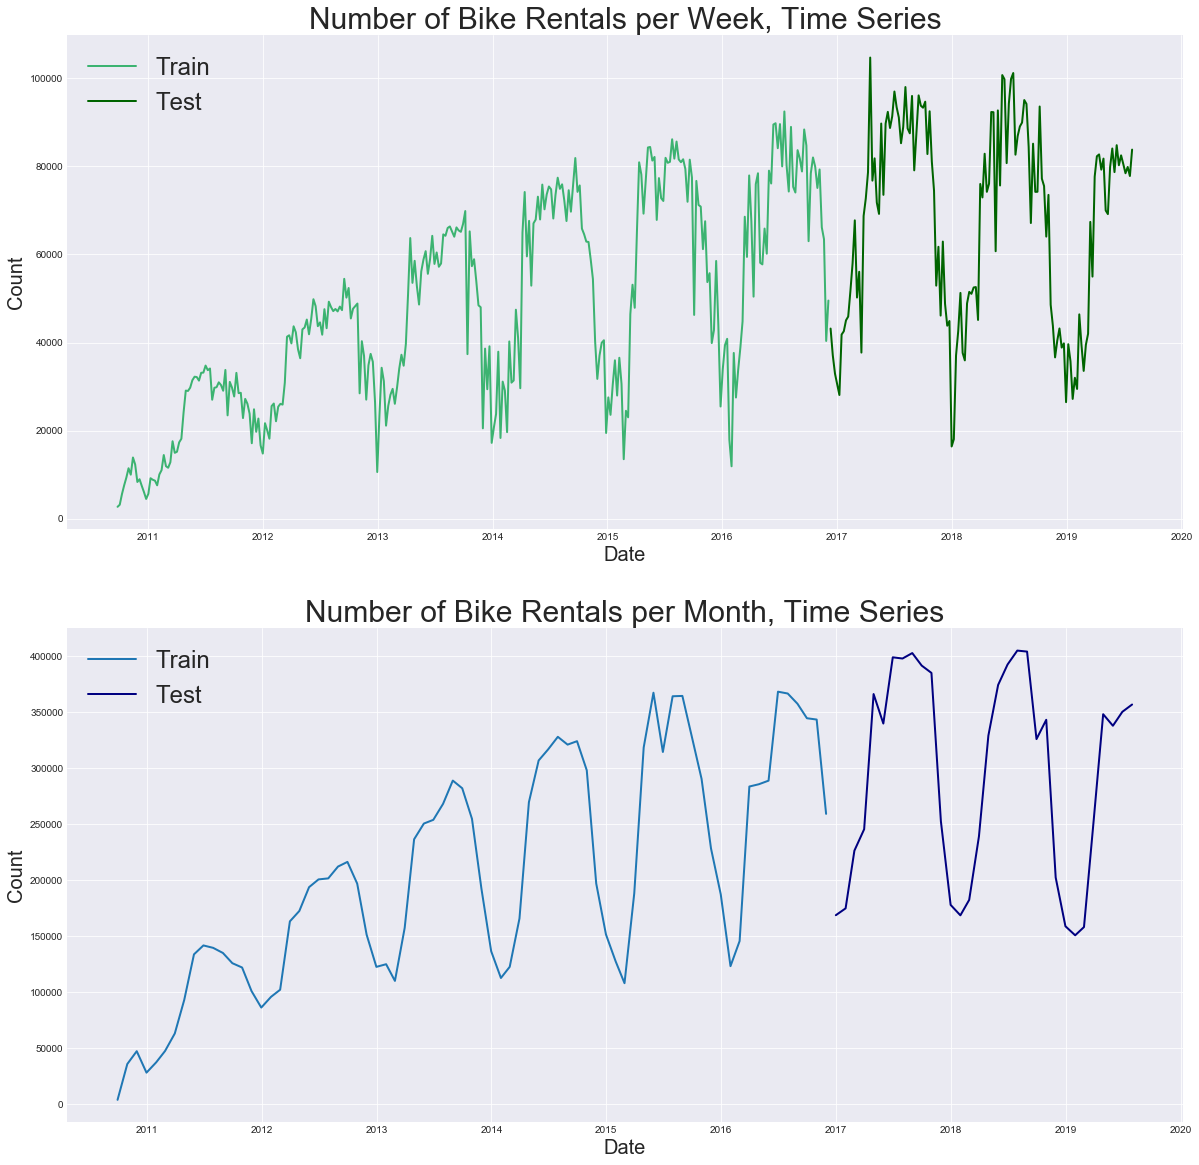

In [10]:
fig = plt.figure(figsize = (20,20))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

ax1.plot(train_w, lw = 2, color = 'mediumseagreen')
ax1.plot(test_w, lw = 2, color = 'darkgreen')
ax2.plot(train_m, lw = 2)
ax2.plot(test_m, lw = 2, color = 'navy')

ax1.set_xlabel('Date', fontsize = 20);
ax1.set_ylabel('Count', fontsize = 20);
ax2.set_xlabel('Date', fontsize = 20);
ax2.set_ylabel('Count', fontsize = 20);

ax1.legend(['Train', 'Test'],prop={'size': 24}) 
ax2.legend(['Train', 'Test'],prop={'size': 24}) 

ax1.set_title('Number of Bike Rentals per Week, Time Series', fontsize = 30);
ax2.set_title('Number of Bike Rentals per Month, Time Series', fontsize = 30);

In [11]:
automodel_d0_D1 = auto_arima(train_m['count'], start_p=0, start_q=0, max_p=3, max_q=3, m=12,start_P=0, seasonal=True,
                                            d=0, D=1, trace=True, error_action='ignore',suppress_warnings=True,
                                            stepwise=True)

Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 1, 12); AIC=1498.174, BIC=1504.604, Fit time=0.213 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=1500.122, BIC=1504.408, Fit time=0.014 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=1484.413, BIC=1492.985, Fit time=0.126 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=1481.711, BIC=1490.284, Fit time=0.136 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 1, 1, 12); AIC=1483.411, BIC=1494.127, Fit time=0.158 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 0, 12); AIC=1480.025, BIC=1486.454, Fit time=0.038 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 0, 12); AIC=1483.426, BIC=1491.999, Fit time=0.092 seconds
Fit ARIMA: order=(0, 0, 2) seasonal_order=(0, 1, 0, 12); AIC=1481.504, BIC=1490.076, Fit time=0.046 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 1, 0, 12); AIC=1482.023, BIC=1492.739, Fit time=0.099 seconds
Fit ARIMA: order=(0, 0, 1) s

In [12]:
automodel_d1_D1 = auto_arima(train_m['count'], start_p=0, start_q=0, max_p=3, max_q=3, m=12,start_P=0, seasonal=True,
                                            d=1, D=1, trace=True, error_action='ignore',suppress_warnings=True,
                                            stepwise=True)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=1474.144, BIC=1480.525, Fit time=0.105 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1479.133, BIC=1483.387, Fit time=0.014 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1474.090, BIC=1482.599, Fit time=0.089 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1461.571, BIC=1470.079, Fit time=0.468 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1463.581, BIC=1474.217, Fit time=0.811 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1455.212, BIC=1461.593, Fit time=0.208 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1459.436, BIC=1467.944, Fit time=0.333 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 0, 12); AIC=1458.244, BIC=1466.753, Fit time=0.048 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 0, 12); AIC=1453.107, BIC=1463.743, Fit time=0.272 seconds
Fit ARIMA: order=(1, 1, 2) s

In [13]:
automodel_d2_D1 = auto_arima(train_m['count'], start_p=0, start_q=0, max_p=3, max_q=3, m=12,start_P=0, seasonal=True,
                                            d=2, D=1, trace=True, error_http://localhost:8888/notebooks/working_notebook2.ipynb#action='ignore',suppress_warnings=True,
                                            stepwise=True)

Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 1, 1, 12); AIC=1496.637, BIC=1502.970, Fit time=0.061 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 1, 0, 12); AIC=1509.149, BIC=1513.371, Fit time=0.019 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 1, 0, 12); AIC=1489.428, BIC=1497.872, Fit time=0.153 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 1, 1, 12); AIC=1469.226, BIC=1477.669, Fit time=0.134 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(1, 1, 1, 12); AIC=1467.720, BIC=1478.274, Fit time=0.212 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(1, 1, 0, 12); AIC=1466.512, BIC=1474.956, Fit time=0.093 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(2, 1, 1, 12); AIC=1468.436, BIC=1481.102, Fit time=0.690 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(1, 1, 0, 12); AIC=1468.073, BIC=1478.627, Fit time=0.165 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 1, 0, 12); AIC=1497.852, BIC=1504.185, Fit time=0.073 seconds
Fit ARIMA: order=(0, 2, 2) s

In [14]:
automodel_d0_D2 = auto_arima(train_m['count'], start_p=0, start_q=0, max_p=3, max_q=3, m=12,start_P=0, seasonal=True,
                                            d=0, D=2, trace=True, error_action='ignore',suppress_warnings=True,
                                            stepwise=True)

Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 2, 1, 12); AIC=1216.752, BIC=1222.547, Fit time=0.117 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 2, 0, 12); AIC=1223.934, BIC=1227.798, Fit time=0.022 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 2, 0, 12); AIC=1219.267, BIC=1226.994, Fit time=0.277 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 2, 1, 12); AIC=1213.423, BIC=1221.150, Fit time=0.184 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 2, 1, 12); AIC=1214.368, BIC=1224.027, Fit time=0.277 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 2, 0, 12); AIC=1224.398, BIC=1230.193, Fit time=0.067 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 2, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 2, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 2, 1, 12); AIC=1210.211, BIC=1219.870, Fit time=0.440 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 2, 1, 

In [15]:
automodel_d1_D2 = auto_arima(train_m['count'], start_p=0, start_q=0, max_p=3, max_q=3, m=12,start_P=0, seasonal=True,
                                            d=1, D=2, trace=True, error_action='ignore',suppress_warnings=True,
                                            stepwise=True)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 2, 1, 12); AIC=1217.298, BIC=1223.034, Fit time=0.139 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 2, 0, 12); AIC=1232.129, BIC=1235.953, Fit time=0.030 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 2, 0, 12); AIC=1216.035, BIC=1223.683, Fit time=0.421 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 2, 1, 12); AIC=1211.392, BIC=1219.040, Fit time=0.227 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 2, 1, 12); AIC=1212.557, BIC=1222.117, Fit time=0.310 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 2, 0, 12); AIC=1213.393, BIC=1219.129, Fit time=0.061 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 2, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 2, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 2, 1, 12); AIC=1213.277, BIC=1222.837, Fit time=0.269 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 2, 1, 

In [16]:
automodel_d2_D2 = auto_arima(train_m['count'], start_p=0, start_q=0, max_p=3, max_q=3, m=12,start_P=0, seasonal=True,
                                            d=2, D=2, trace=True, error_action='ignore',suppress_warnings=True,
                                            stepwise=True)

Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 2, 1, 12); AIC=1238.536, BIC=1244.212, Fit time=0.145 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 2, 0, 12); AIC=1253.236, BIC=1257.020, Fit time=0.029 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 2, 0, 12); AIC=1221.220, BIC=1228.788, Fit time=1.360 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 2, 1, 12); AIC=1206.646, BIC=1214.213, Fit time=0.670 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(1, 2, 1, 12); AIC=1204.892, BIC=1214.351, Fit time=1.087 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(1, 2, 0, 12); AIC=1204.751, BIC=1212.318, Fit time=0.536 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(2, 2, 1, 12); AIC=1206.869, BIC=1218.220, Fit time=1.574 seconds
Fit ARIMA: order=(1, 2, 1) seasonal_order=(1, 2, 0, 12); AIC=1205.588, BIC=1215.048, Fit time=0.899 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 2, 0, 12); AIC=1237.129, BIC=1242.804, Fit time=0.237 seconds
Fit ARIMA: order=(0, 2, 2) s

In [17]:
print(automodel_d0_D1.aic())
print(automodel_d1_D1.aic())
print(automodel_d2_D1.aic())
print(automodel_d0_D2.aic())
print(automodel_d1_D2.aic())
print(automodel_d2_D2.aic())

1480.0248869457093
1449.625314326672
1440.119944872698
1205.0444701468173
1211.3917462785846
1204.7511864010492


In [18]:
best_models = [(automodel_d0_D1, 'd = 0, D = 1'), (automodel_d1_D1, 'd = 1, D = 1'), 
               (automodel_d2_D1, 'd = 2, D = 1'), (automodel_d0_D2, 'd = 0, D = 2'), 
               (automodel_d1_D2, 'd = 1, D = 2'), (automodel_d2_D2, 'd = 2, D = 2')]

In [19]:
for model, mod_name in best_models:
    print(mod_name)
    print('Order: ', model.order, ' Seasonal Order: ', model.seasonal_order)
    mse.compare_mse_auto(model, train_m, train_m)
    print('')

d = 0, D = 1
Order:  (0, 0, 1)  Seasonal Order:  (0, 1, 0, 12)
Training MSE:  9.81e+08
Testing MSE:  4.71e+10

d = 1, D = 1
Order:  (2, 1, 3)  Seasonal Order:  (0, 1, 0, 12)
Training MSE:  1.13e+09
Testing MSE:  2.72e+10

d = 2, D = 1
Order:  (2, 2, 3)  Seasonal Order:  (0, 1, 0, 12)
Training MSE:  7.75e+08
Testing MSE:  2.08e+11

d = 0, D = 2
Order:  (2, 0, 2)  Seasonal Order:  (0, 2, 1, 12)
Training MSE:  2.84e+09
Testing MSE:  2.74e+10

d = 1, D = 2
Order:  (0, 1, 1)  Seasonal Order:  (0, 2, 1, 12)
Training MSE:  1.41e+09
Testing MSE:  4.90e+11

d = 2, D = 2
Order:  (0, 2, 1)  Seasonal Order:  (1, 2, 0, 12)
Training MSE:  1.36e+09
Testing MSE:  4.54e+12



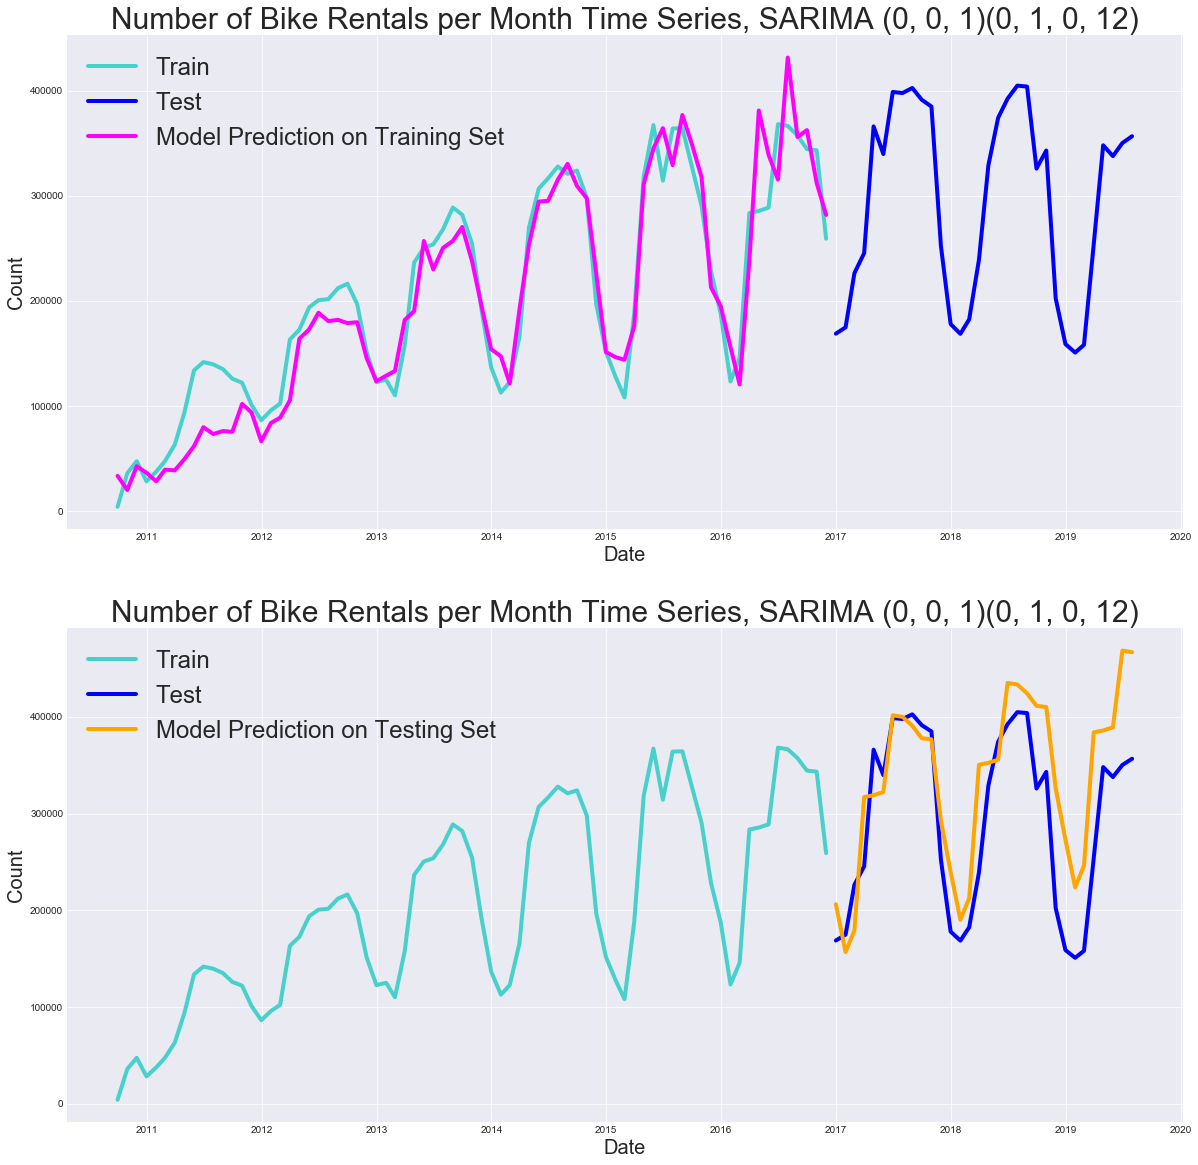

In [20]:
pplot.prediction_plot(automodel_d0_D1,train_m,test_m)

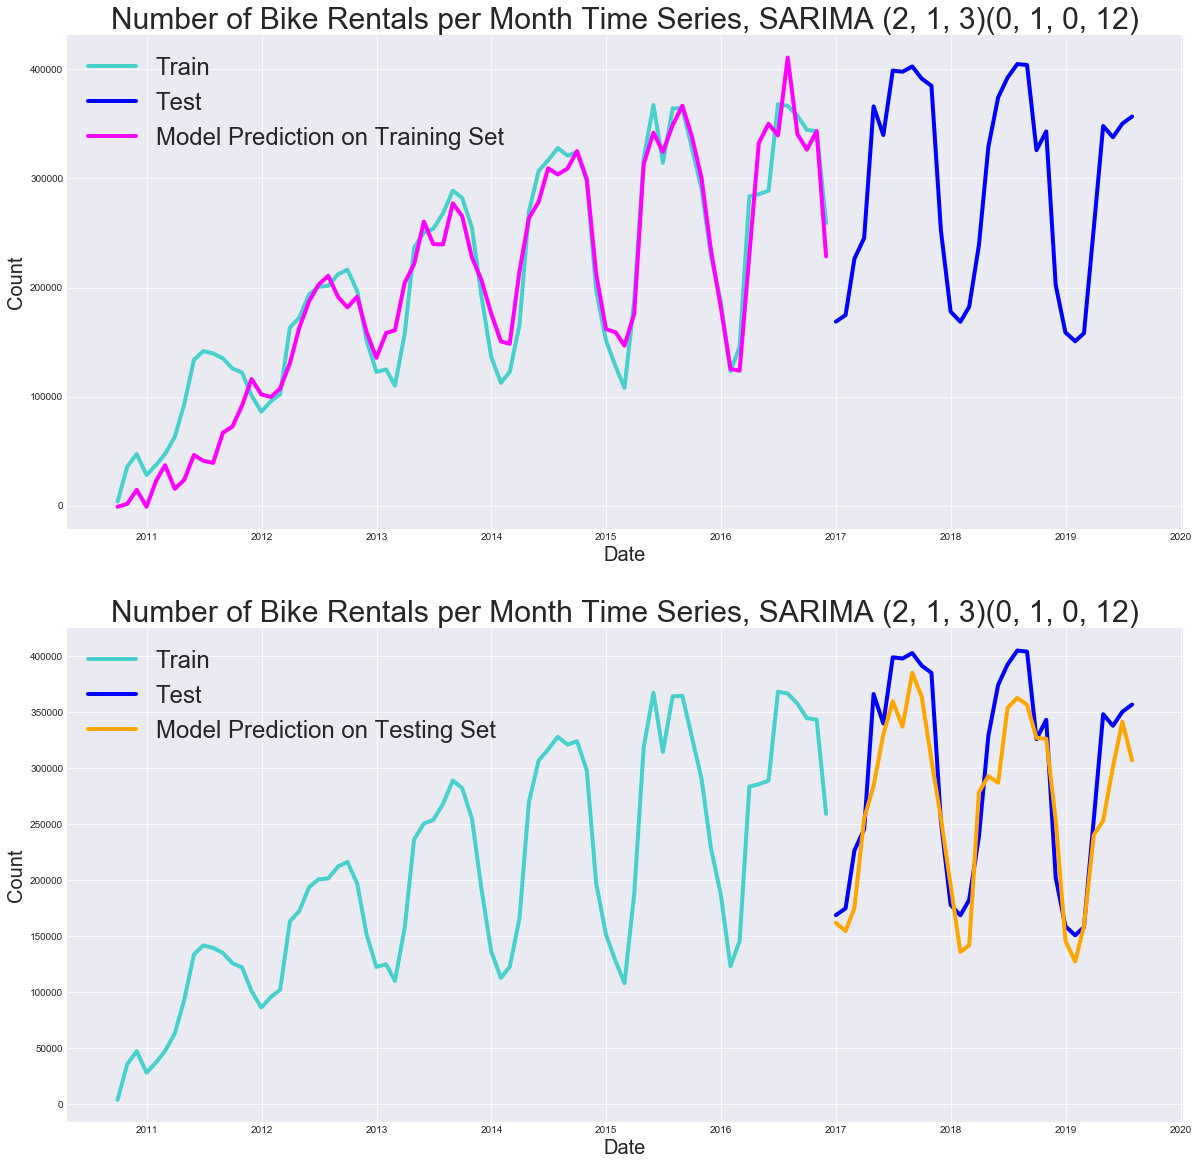

In [21]:
pplot.prediction_plot(automodel_d1_D1,train_m,test_m)

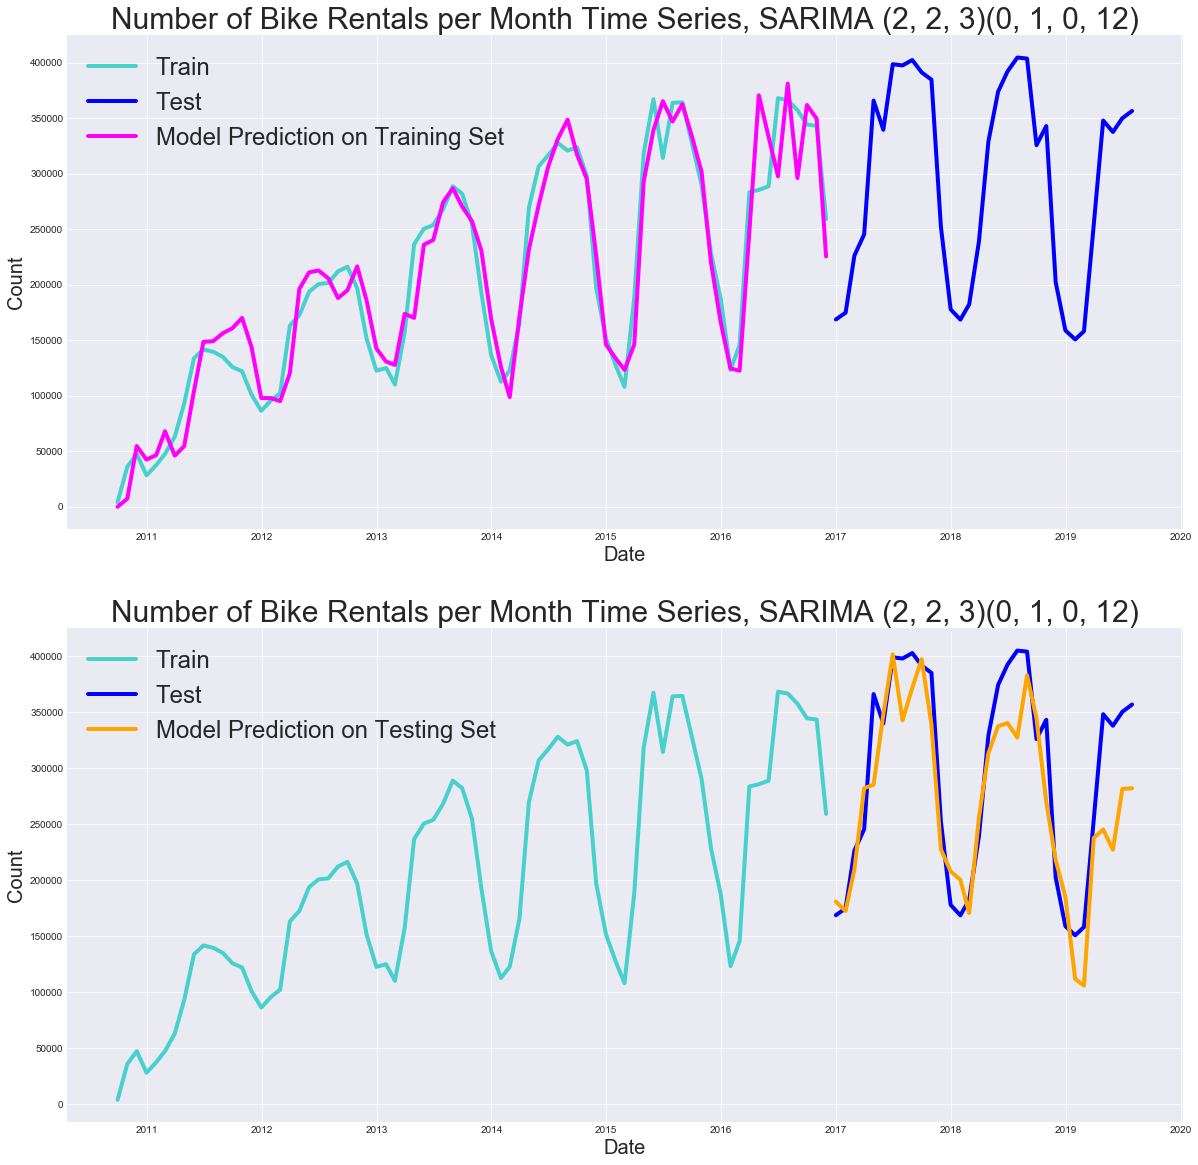

In [22]:
pplot.prediction_plot(automodel_d2_D1,train_m,test_m)

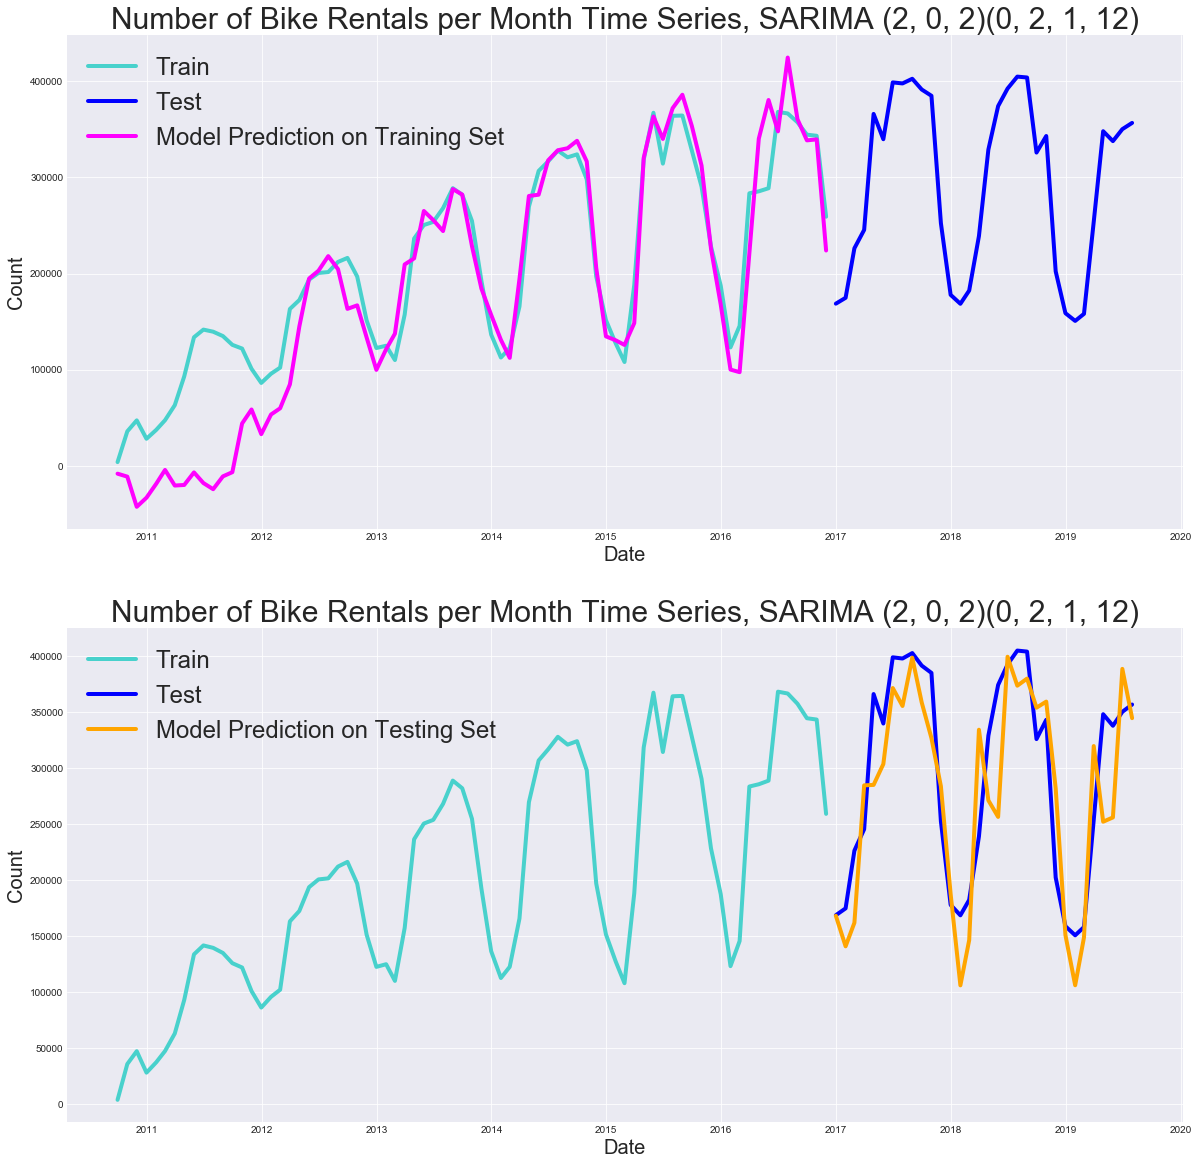

In [23]:
pplot.prediction_plot(automodel_d0_D2,train_m,test_m)

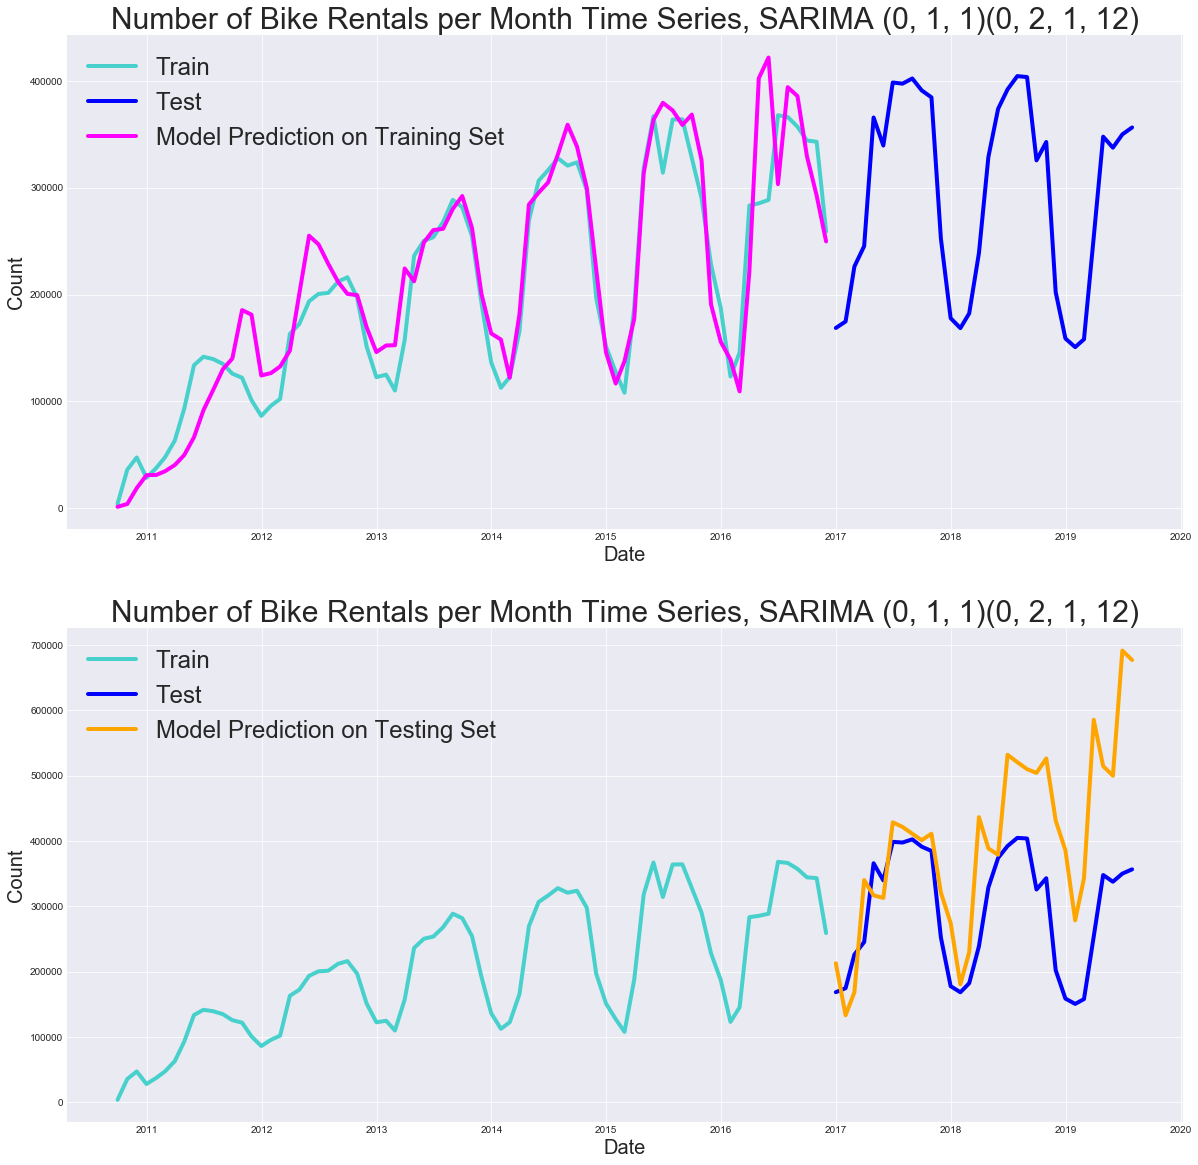

In [24]:
pplot.prediction_plot(automodel_d1_D2,train_m,test_m)

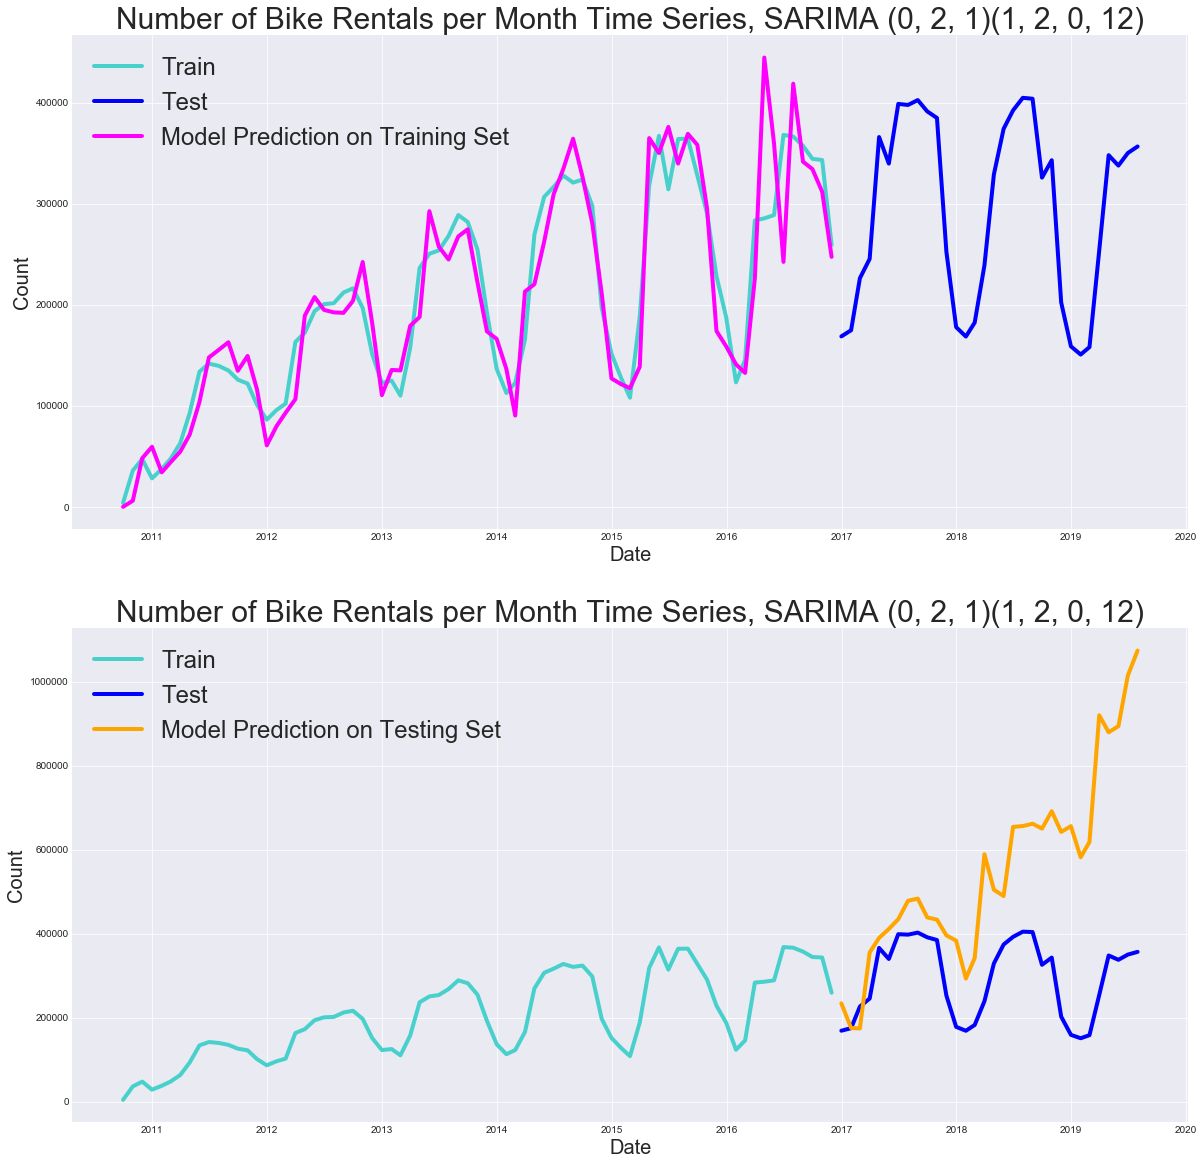

In [25]:
pplot.prediction_plot(automodel_d2_D2,train_m,test_m)

## The two best SARIMA Models appear to occur at d = 1, D = 1 and d = 0, D = 2.

In [26]:
weekly_automodel_d1_D1 = auto_arima(train_w['count'], start_p=0, start_q=0, max_p=3, max_q=3, m=52,start_P=0, seasonal=True,
                                            d=1, D=1, trace=True, error_action='ignore',suppress_warnings=True,
                                            stepwise=True)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 52); AIC=5760.685, BIC=5771.492, Fit time=10.527 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=5820.215, BIC=5827.420, Fit time=1.035 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=5723.351, BIC=5737.759, Fit time=5.202 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=5682.266, BIC=5696.674, Fit time=5.558 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 52); AIC=5684.142, BIC=5702.153, Fit time=9.433 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 52); AIC=5726.714, BIC=5737.521, Fit time=0.943 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=5684.146, BIC=5702.157, Fit time=8.267 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1,

In [27]:
weekly_automodel_d0_D2 = auto_arima(train_w['count'], start_p=0, start_q=0, max_p=3, max_q=3, m=52,start_P=0, seasonal=True,
                                            d=0, D=2, trace=True, error_action='ignore',suppress_warnings=True,
                                            stepwise=True)

Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 2, 1, 52); AIC=4725.651, BIC=4735.832, Fit time=58.278 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 2, 0, 52); AIC=4844.602, BIC=4851.389, Fit time=1.769 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 2, 0, 52); AIC=4777.878, BIC=4791.452, Fit time=16.604 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 2, 1, 52); AIC=4727.841, BIC=4741.415, Fit time=75.301 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 2, 1, 52); AIC=4758.571, BIC=4772.146, Fit time=17.643 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 2, 2, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 2, 2, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 2, 1, 52); AIC=4762.414, BIC=4775.989, Fit time=24.343 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 2, 1, 52); AIC=4756.122, BIC=4773.090, Fit time=38.346 seconds
Total fit time: 232.299 seconds


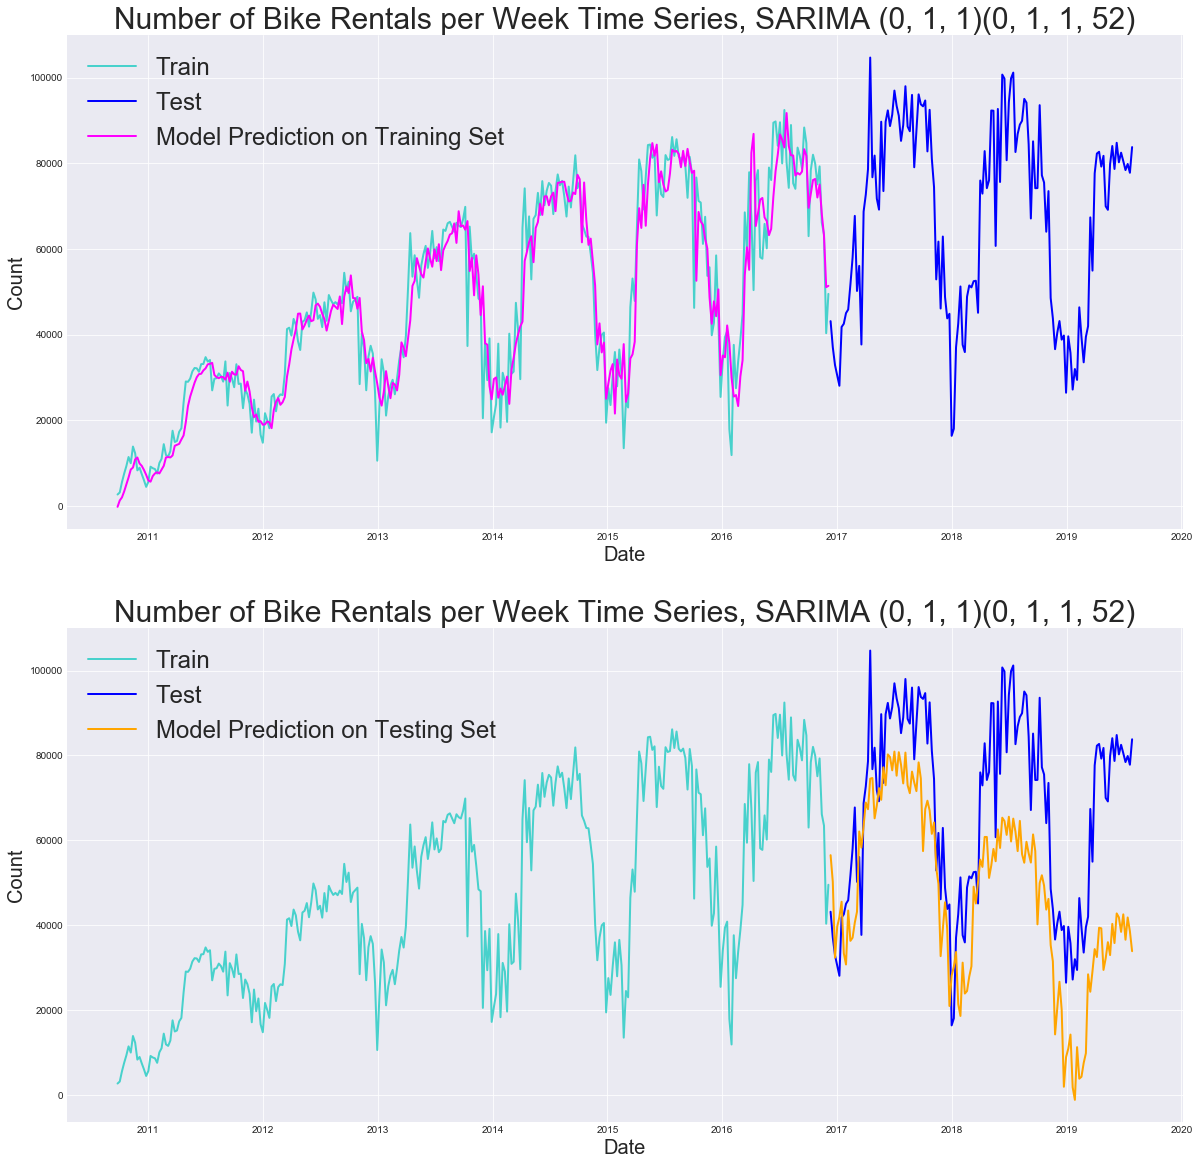

In [34]:
pplot.prediction_plot(weekly_automodel_d1_D1,train_w,test_w)

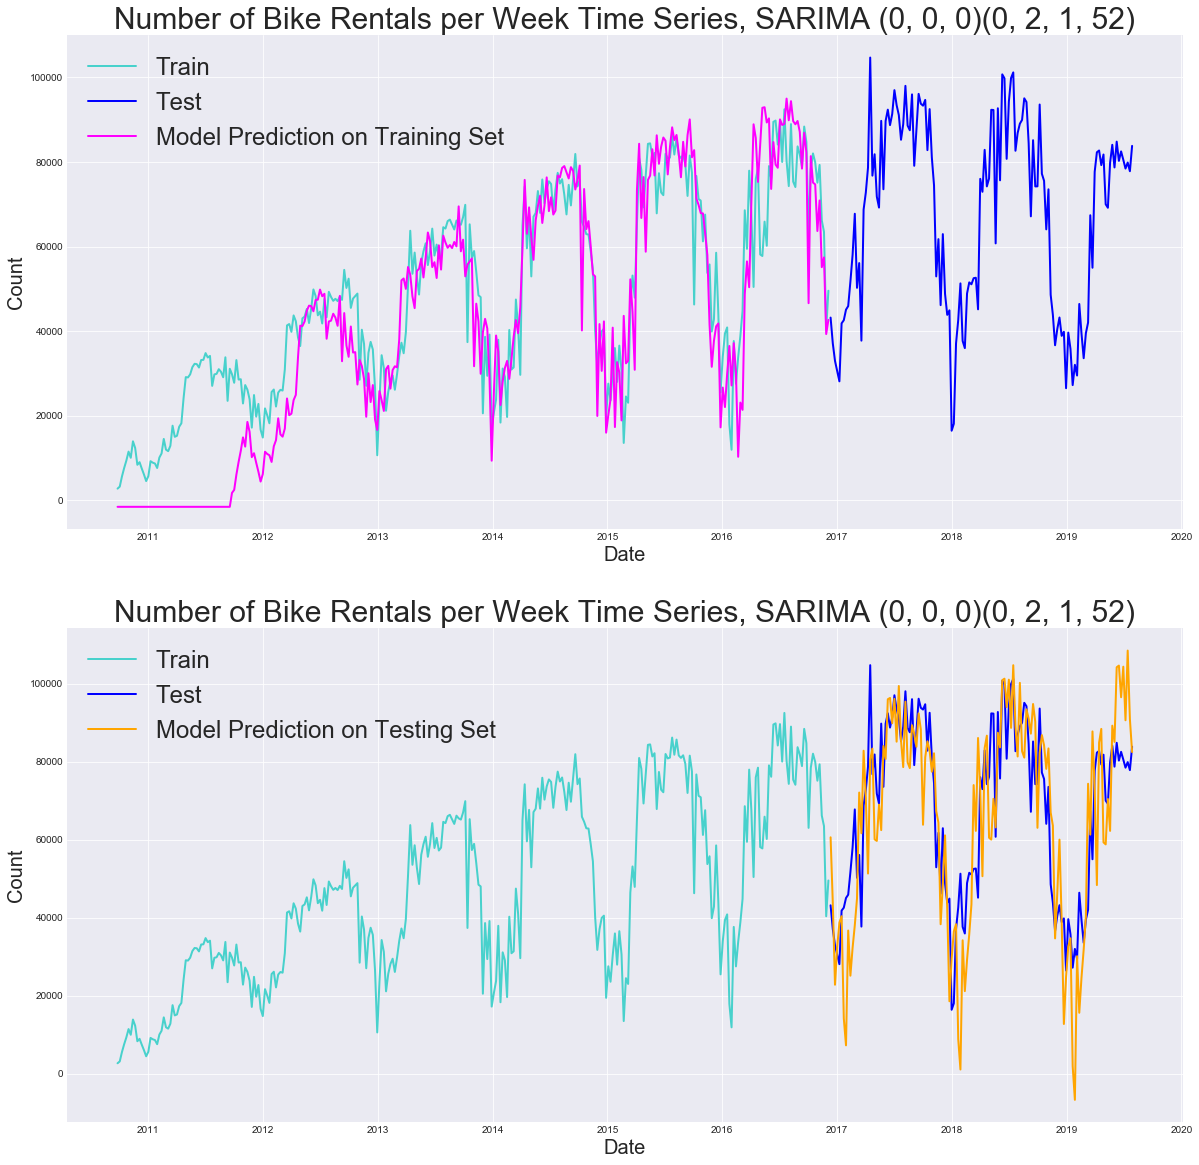

In [35]:
pplot.prediction_plot(weekly_automodel_d0_D2,train_w,test_w)

## Weekly data is somewhat unstable. Therefore, it might be better to model based on monthly data. The best model for the monthly data was (2,1,3)(0,1,0,12).

In [36]:
automodel_d1_D1.order, automodel_d1_D1.seasonal_order

((2, 1, 3), (0, 1, 0, 12))

(array([ 5.,  6.,  6., 16., 19., 15.,  1.,  3.,  1.,  3.]),
 array([-61343.90865579, -45152.45630543, -28961.00395506, -12769.5516047 ,
          3421.90074567,  19613.35309603,  35804.8054464 ,  51996.25779676,
         68187.71014713,  84379.16249749, 100570.61484786]),
 <a list of 10 Patch objects>)

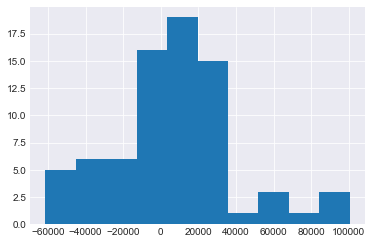

In [37]:
model_resids = automodel_d1_D1.resid()
plt.hist(model_resids)

In [38]:
automodel_d1_D1.params()

array([-2.29648138e+03, -4.75458748e-01, -9.96137451e-01, -3.76765168e-01,
        3.31184670e-01, -9.54286452e-01,  8.57229528e+08])

In [39]:
automodel_d1_D1.pvalues()

array([4.64711601e-06, 1.01969240e-28, 5.17841335e-64, 2.62973181e-01,
       2.33173761e-01, 1.53042617e-03, 0.00000000e+00])

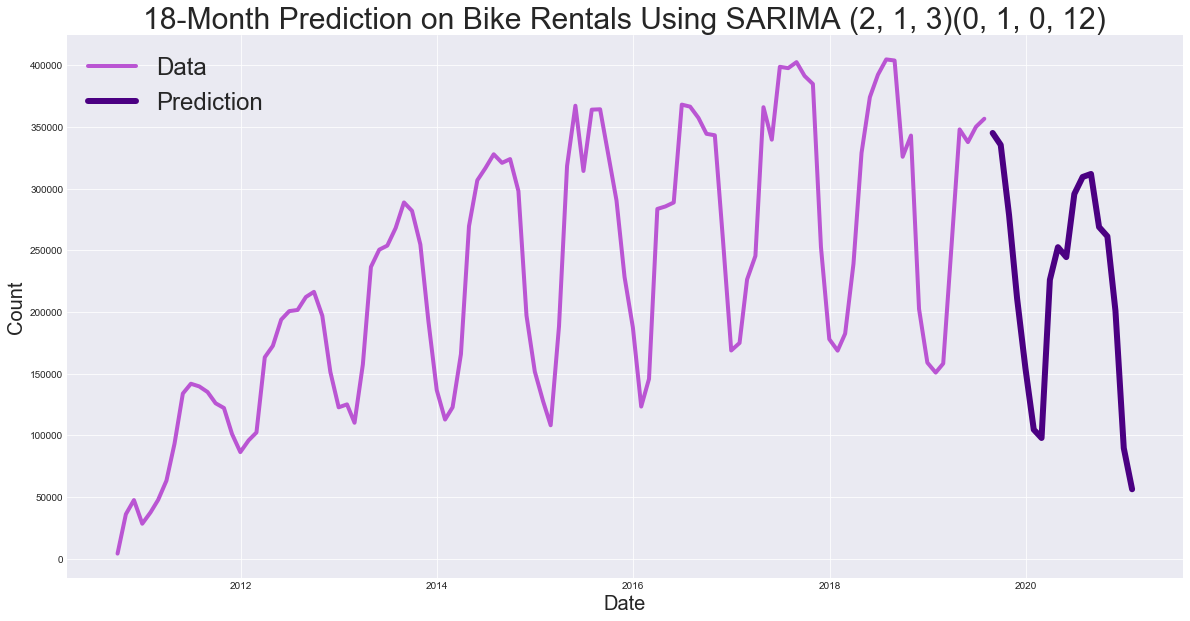

In [40]:
pplot.forecast_plot(automodel_d1_D1,master_m,18)